# Data Visualization

### Traffic Count Data Set

##### Adam Funk 4/5/2022

Purpose: The purpose of the Jupyter Notebook is to visualize data from the Traffic Count Data Set retrieved from WPRDC. I intend to identify any trends from this data set and use this to further our argument on which neighborhood is the best environment for biking in Pittsburgh.

### Import Packages with Pandas

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Read in CSV File

Let's read in our csv file containing our data and use the head function to get an idea of how our data set is organized.

In [13]:
data = pd.read_csv("traffic_count.csv")

In [14]:
data.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


### Average Daily Car Traffic

Let's filter a subset of the data to look at neighborhoods and average daily car traffic (dropping NaN values).

In [15]:
data_car_neighbor = data[["average_daily_car_traffic", "neighborhood"]].dropna()

In our data set, it appears that we have multiple occurrences of some neighborhoods. Let's use the groupby() function and lambda function to set these average car traffic counts by neighborhood.

In [24]:
group_data = data_car_neighbor.groupby("neighborhood").agg(lambda x: x.tolist())

Let's iterate through our data frame and total up the average car traffic measures for each neighborhood.

In [25]:
my_list = []
for index, row in group_data.iterrows():
    my_list.append(sum(row["average_daily_car_traffic"]))

Finally, let's create a new column with these total car traffic values in our data frame.

In [26]:
group_data.insert(1, "total_car_traffic", my_list)

In [27]:
display(group_data)

,average_daily_car_traffic,total_car_traffic
neighborhood,,
Allegheny Center,[2386.0],2386.0
Allegheny West,[477.0],477.0
Arlington,"[2224.0, 2347.0]",4571.0
Beechview,"[2046.0, 763.0, 1446.0]",4255.0
Beltzhoover,[1577.0],1577.0
...,...,...
Summer Hill,[937.0],937.0
Upper Hill,"[1530.0, 927.0, 403.0]",2860.0
West Oakland,[2585.0],2585.0


We will now use a bar plot to visualize the total car traffic by neighborhood.

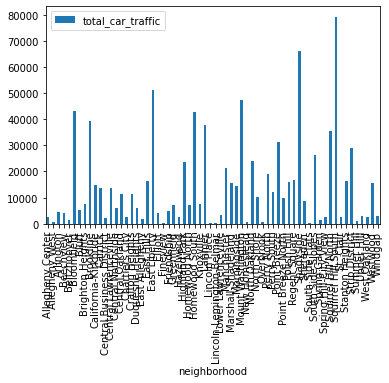

In [28]:
group_data.plot(kind = "bar")

It's nice to have a visualization of the total car traffic throughout neighborhoods in Pittsburgh, but what if we could just pull the neighborhood with the least total car traffic?

In [29]:
print(group_data[group_data.total_car_traffic == group_data.total_car_traffic.min()])

                 average_daily_car_traffic  total_car_traffic
neighborhood                                                 
South Side Flats                   [115.0]              115.0


The code above says that South Side Flats has the least amount of total car traffic. That's helpful information but what if we could look at the top 5 neighborhoods with least total car traffic?

In [41]:
group_data.sort_values("total_car_traffic").head(5)

,average_daily_car_traffic,total_car_traffic
neighborhood,,
South Side Flats,[115.0],115.0
Lincoln Place,[126.0],126.0
Lincoln-Lemington-Belmar,[195.0],195.0
Fineview,[419.0],419.0
Allegheny West,[477.0],477.0


Above we have displayed the top 5 neighborhoods with the lowest total car traffic. While this is certainly useful information, what else can we learn from this dataset? Let's look at what columns our data set contains.

In [32]:
data.columns

Index(['id', 'device_id', 'record_oid', 'count_start_date', 'count_end_date',
       'average_daily_car_traffic', 'average_daily_bike_traffic',
       'counter_number', 'counter_type', 'speed_limit', 'max_speed',
       'median_speed', 'percent_over_limit', 'speed85_percent',
       'speed95_percent', 'longitude', 'latitude', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone'],
      dtype='object')

It looks like we have 2 additional columns that may be of use to us - average daily bike traffic and percent over the speed limit. The more daily bike traffic indicates others bike in that neighborhood frequently - indicating it is a safe environment. Additionally, the higher the percent of drivers over the speed limit increases the liklihood for car accidents which can endanger bikers. First, let's consider the average daily bike traffic. 

### Average Daily Bike Traffic

In [34]:
bike_neighbor_data = data[["average_daily_bike_traffic", "neighborhood"]].dropna()

Considering the daily bike traffic, let's group by neighborhood and see how much bike traffic data has been recorded.

In [35]:
bike_data = bike_neighbor_data.groupby("neighborhood").agg(lambda x: x.tolist())

In [36]:
display(bike_data)

,average_daily_bike_traffic
neighborhood,
Central Oakland,[198.0]
North Oakland,"[88.0, 102.0]"
South Oakland,"[2063.0, 1278.0]"
South Side Flats,"[954.0, 892.0]"


Looking at the dataset above, it seems that there is very little data concerning bike traffic. However, we can still look at the data we have available regarding bike traffic and calculate total bike traffic.

In [42]:
bike_totals = []
for index, row in bike_data.iterrows():
    bike_totals.append(sum(row["average_daily_bike_traffic"]))

In [44]:
bike_data.insert(1, "total_bike_traffic", bike_totals)

In [45]:
display(bike_data)

,average_daily_bike_traffic,total_bike_traffic
neighborhood,,
Central Oakland,[198.0],198.0
North Oakland,"[88.0, 102.0]",190.0
South Oakland,"[2063.0, 1278.0]",3341.0
South Side Flats,"[954.0, 892.0]",1846.0


Let's use another bar chart to visualize the total bike traffic by neighborhood.

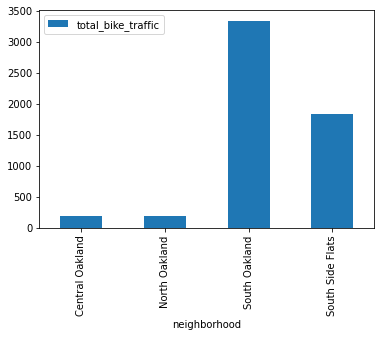

In [46]:
bike_data.plot(kind = "bar")

From the bar chart above, it is clear that South Oakland has the most bike traffic; however, South Side Flats - the neighborhood identified with the lowest total car traffic has a comparable amount of bike traffic.

In [49]:
bike_data.sort_values("total_bike_traffic", ascending = False)

,average_daily_bike_traffic,total_bike_traffic
neighborhood,,
South Oakland,"[2063.0, 1278.0]",3341.0
South Side Flats,"[954.0, 892.0]",1846.0
Central Oakland,[198.0],198.0
North Oakland,"[88.0, 102.0]",190.0


After sorting out data by total bike traffic, it becomes clear that **South Oakland** has the most bike traffic and **South Side Flats** has the second most bike traffic of the data collected.

### Percent Over Speed Limit

Finally, let's consider the percent over speed limit parameter of this data set. This can indicate how safe the resulting neighborhood is for biking by indicating how many drivers exceed the local speed limits. 

In [52]:
speed_limit_neighborhood_data = data[["percent_over_limit", "neighborhood"]].dropna()

In [53]:
speed_limit_neighborhood_data

,percent_over_limit,neighborhood
0,77.0,Polish Hill
2,28.0,Windgap
3,70.0,Squirrel Hill South
5,2.0,Central Northside
7,58.0,Polish Hill
...,...,...
407,13.0,Homewood South
408,17.0,Homewood South
410,29.0,Bloomfield
411,10.0,Bloomfield


Again, let's group together repeating neighborhoods using the `groupby` function.

In [54]:
speed_limit_data = speed_limit_neighborhood_data.groupby("neighborhood").agg(lambda x: x.tolist())

In [55]:
speed_limit_data

,percent_over_limit
neighborhood,
Allegheny Center,[65.0]
Allegheny West,[11.0]
Arlington,"[73.0, 50.0]"
Beechview,"[85.0, 20.0, 72.0]"
Bloomfield,"[17.0, 14.0, 14.0, 91.0, 15.0, 8.0, 23.0, 29.0..."
...,...
Summer Hill,[55.0]
Upper Hill,"[15.0, 0.0, 58.0]"
West Oakland,[28.0]


Now that we have grouped repeated neighborhoods into a list, lets find the average percent over the speed limit for each neighborhood. We can use the mean function from the numpy package we imported above. 

In [58]:
speed_totals = []
for index, row in speed_limit_data.iterrows():
    speed_totals.append(np.mean(row["percent_over_limit"]))

In [59]:
speed_limit_data.insert(1, "average_percent_over_limit", speed_totals)

In [60]:
display(speed_limit_data)

,percent_over_limit,average_percent_over_limit
neighborhood,,
Allegheny Center,[65.0],65.000000
Allegheny West,[11.0],11.000000
Arlington,"[73.0, 50.0]",61.500000
Beechview,"[85.0, 20.0, 72.0]",59.000000
Bloomfield,"[17.0, 14.0, 14.0, 91.0, 15.0, 8.0, 23.0, 29.0...",24.555556
...,...,...
Summer Hill,[55.0],55.000000
Upper Hill,"[15.0, 0.0, 58.0]",24.333333
West Oakland,[28.0],28.000000


Let's make use of the bar graph plot to visualize what this average percent of people driving over the speed limit looks like.

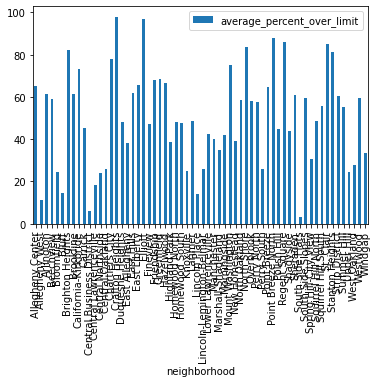

In [61]:
speed_limit_data.plot(kind = "bar")

Now, let's sort these values from low to high to identify the neighborhoods with the lowest percent of drivers exceeding the speed limit.

In [62]:
speed_limit_data.sort_values("average_percent_over_limit")

,percent_over_limit,average_percent_over_limit
neighborhood,,
South Side Flats,[3.0],3.000000
Central Business District,[6.0],6.000000
Allegheny West,[11.0],11.000000
Lincoln Place,[14.0],14.000000
Bluff,"[23.0, 9.0, 12.0]",14.666667
...,...,...
St. Clair,[85.0],85.000000
Regent Square,[86.0],86.000000
Point Breeze North,"[81.0, 95.0]",88.000000


After sorting these values, we see - for a third time - **South Side Flats** is a relevant neighborhood as this has the lowest percent of drivers exceeding the speed limits. 

### Conclusion

From the data we have seen above, I would argue that South Side Flats is the best neighborhood to support a biking environment given that it has the least amount of car traffic on a daily basis, the second most daily bike traffic, and the lowest percent of drivers exceeding the speed limit.